In [1]:
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
file_path = "/drive/My Drive/Fall24/IS733/Labs/Dataset/student_data.csv"
df = pd.read_csv(file_path)

In [4]:
X=df.drop('Results',axis=1)
y=df['Results']

** Task 1b: Build a logistic regression model
Using the dataset “student_data.csv,” write code to (1) create a visualization of the data, (2) fit a model using logistic regression, (3) output model coefficients and performance metrics such as accuracy and AUC and ROC; NOTE: For this exercise, you will train and test on the same given dataset, instead of doing train/test split. Make sure you give the correct GPT prompt.
**

In [5]:
df

,Hours_Studied,Review_Session,Results
0,3.745401,0,0
1,9.507143,1,1
2,7.319939,0,1
3,5.986585,0,1
4,1.560186,1,1
...,...,...,...
95,4.937956,1,1
96,5.227328,1,1
97,4.275410,0,1
98,0.254191,0,0


In [6]:
import seaborn as sns

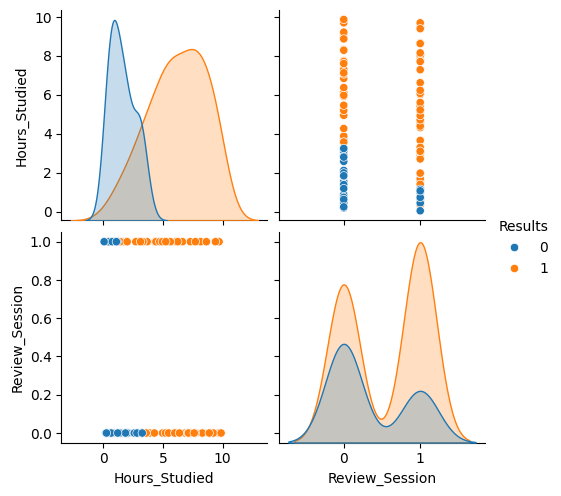

In [7]:
sns.pairplot(df,hue='Results')
plt.show()

In [8]:
import numpy as np
from sklearn.linear_model import LogisticRegression

In [9]:
model = LogisticRegression()
model.fit(X,y)

LogisticRegression()

In [10]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y, model.predict(X))
print("Accuracy:", acc)

Accuracy: 0.93


In [11]:
coefficients = model.coef_[0]
intercept = model.intercept_[0]

coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

print(coeff_df)


          Feature  Coefficient
0   Hours_Studied     1.365420
1  Review_Session     1.877976


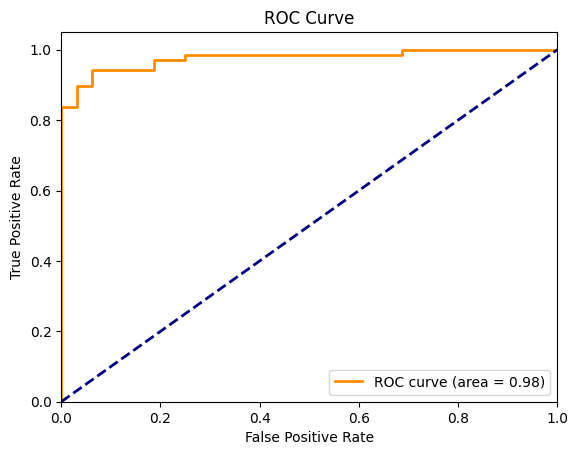

In [12]:
from sklearn.metrics import roc_curve, auc
prob_roc = model.predict_proba(X)[:,1]
fpr, tpr, thresholds = roc_curve(y, prob_roc)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

**Task 2:  Understanding and Prevent Overfitting in the context of SVM

Write code to fit a Support Vector Machine model using (1) linear kernel and (2) RBF kernel. For the RBF kernel, use grid search to find the best gamma parameter using k-fold cross-validation.

Submission: 1(a) writeup in a doc; 1(b) and (2) Python Notetook uploaded to GitHub and submit a link to Blackboard; link to chatGPT log
**

In [13]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)
y_pred = linear_svm.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Linear SVM Accuracy:", acc)

Linear SVM Accuracy: 0.85


In [16]:
radial_svm = SVC(kernel='rbf')
radial_svm.fit(X_train, y_train)
y_pred = radial_svm.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Radial SVM Accuracy:", acc)

Radial SVM Accuracy: 0.85


In [17]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(SVC(kernel='linear'), param_grid, cv=3,scoring='accuracy')
grid_search.fit(X_train, y_train)
best_c = grid_search.best_params_

In [18]:
best_c

{'C': 1}

In [19]:
linear_svm = SVC(kernel='linear',C=1)
linear_svm.fit(X_train, y_train)
y_pred = linear_svm.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Linear SVM Accuracy:", acc)

Linear SVM Accuracy: 0.85


In [20]:
param_grid = {'C': [0.01,0.1, 1, 10, 100], 'gamma': [100,10, 1, 0.1, 0.01]}
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=3,scoring='accuracy')
grid_search.fit(X_train, y_train)
best_values = grid_search.best_params_

In [21]:
best_values

{'C': 10, 'gamma': 1}

In [22]:
radial_svm = SVC(kernel='rbf',gamma=1,C=10)
radial_svm.fit(X_train, y_train)
y_pred = radial_svm.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Radial SVM Accuracy:", acc)

Radial SVM Accuracy: 0.9
